# MPlots
Jugando con los MatrixProfile & MPlots comenzando con el tutorial de Stumpy
https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html

In [ ]:
import numpy as np
import dvats.memory as mem
import dvats.mplots as mp

In [ ]:
mps = mp.MatrixProfiles()

In [ ]:
#Common
mps.data = np.random.rand(10000)
mps.subsequence_len = 50
print("Ts ~ ", mps.data.shape)
print("Expected mp length: ", int(np.floor(mps.data.shape[0]-mps.subsequence_len+1)))

Ts ~  (10000,)
Expected mp length:  9951


## Compute & Save Matrix Profile 
> using both stumpy.stump & scamp

In [ ]:
mps.compute(
    method     = 'stump_gpu',  
    print_flag = True, 
    debug      = True, 
    timed      = True
)
print("Total MPs: ", len(mps.matrix_profiles))
print(mps.matrix_profiles[0])

Subsequence len:  50
--> matrix profile
--> Stump (GPU)


/usr/local/share/miniconda3/envs/env/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 20 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


matrix profile 6.20454216003418 seconds -->
MPs | compute -> Subsequence len out:  50
MPs | compute -> Subsequence len inside:  50
Total MPs:  1
MP: [6.822815322770422 6.6678143586413965 6.575336830412965 ...
 6.6313189554879886 6.874760722703052 6.758184022548799]
Ids: [6277 6278 6279 ... 5321 5322 5323]
Ids_left: [-1 -1 -1 ... 5321 5322 5323]
Ids_right: [6277 6278 6279 ... -1 -1 -1]
Computation_time: 6.20454216003418
subsequence_len: 50
method: stump_gpu


In [ ]:
# Compute & Save Matrix Profile using both stumpy.stump & scamp
mps.compute('stump_gpu',  True, True, True)
print("Total MPs: ", len(mps.matrix_profiles))
print(mps.matrix_profiles[0])
mps.compute('scamp',  True, True, True)
print("Total MPs: ", len(mps.matrix_profiles))
print(mps.matrix_profiles[1])

Subsequence len:  50
--> matrix profile
--> Stump (GPU)
matrix profile 2.229508399963379 seconds -->
MPs | compute -> Subsequence len out:  50
MPs | compute -> Subsequence len inside:  50
Total MPs:  2
MP: [6.822815322770422 6.6678143586413965 6.575336830412965 ...
 6.6313189554879886 6.874760722703052 6.758184022548799]
Ids: [6277 6278 6279 ... 5321 5322 5323]
Ids_left: [-1 -1 -1 ... 5321 5322 5323]
Ids_right: [6277 6278 6279 ... -1 -1 -1]
Computation_time: 6.20454216003418
subsequence_len: 50
method: stump_gpu
Subsequence len:  50
--> matrix profile
--> Scamp
matrix profile 0.31580185890197754 seconds -->
MPs | compute -> Subsequence len out:  50
MPs | compute -> Subsequence len inside:  50
Total MPs:  3
MP: [6.822815322770422 6.6678143586413965 6.575336830412965 ...
 6.6313189554879886 6.874760722703052 6.758184022548799]
Ids: [6277 6278 6279 ... 5321 5322 5323]
Ids_left: [-1 -1 -1 ... 5321 5322 5323]
Ids_right: [6277 6278 6279 ... -1 -1 -1]
Computation_time: 2.229508399963379
subse

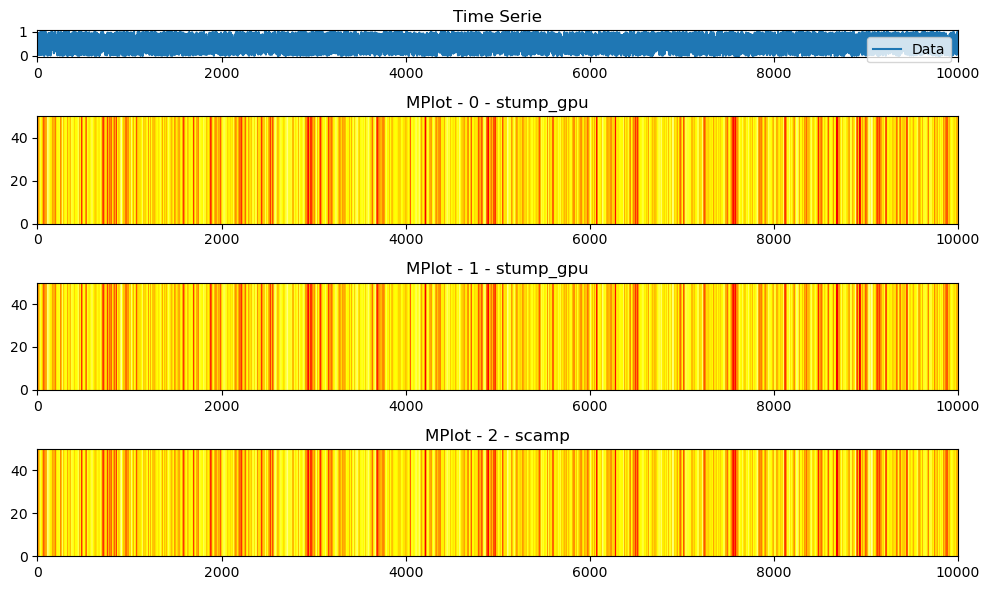

In [ ]:
mps.plot([])

### Ejemplo de STUMPY Basics - Analyzing Motifs and Anomalies with STUMP and SCAMP
https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [ ]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


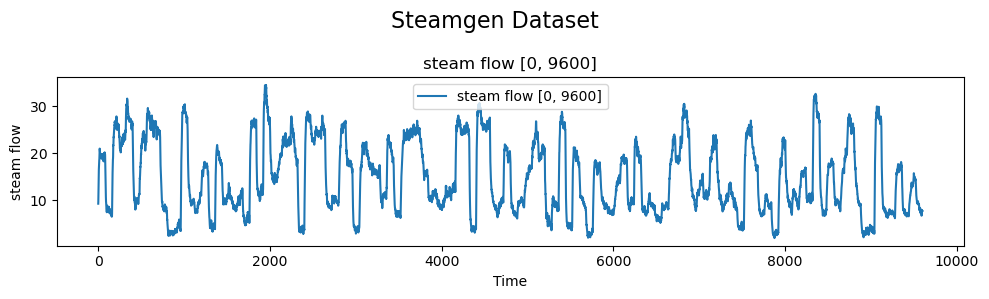

In [ ]:
mp.plot_dataFrame('Steamgen Dataset', steam_df, [3])

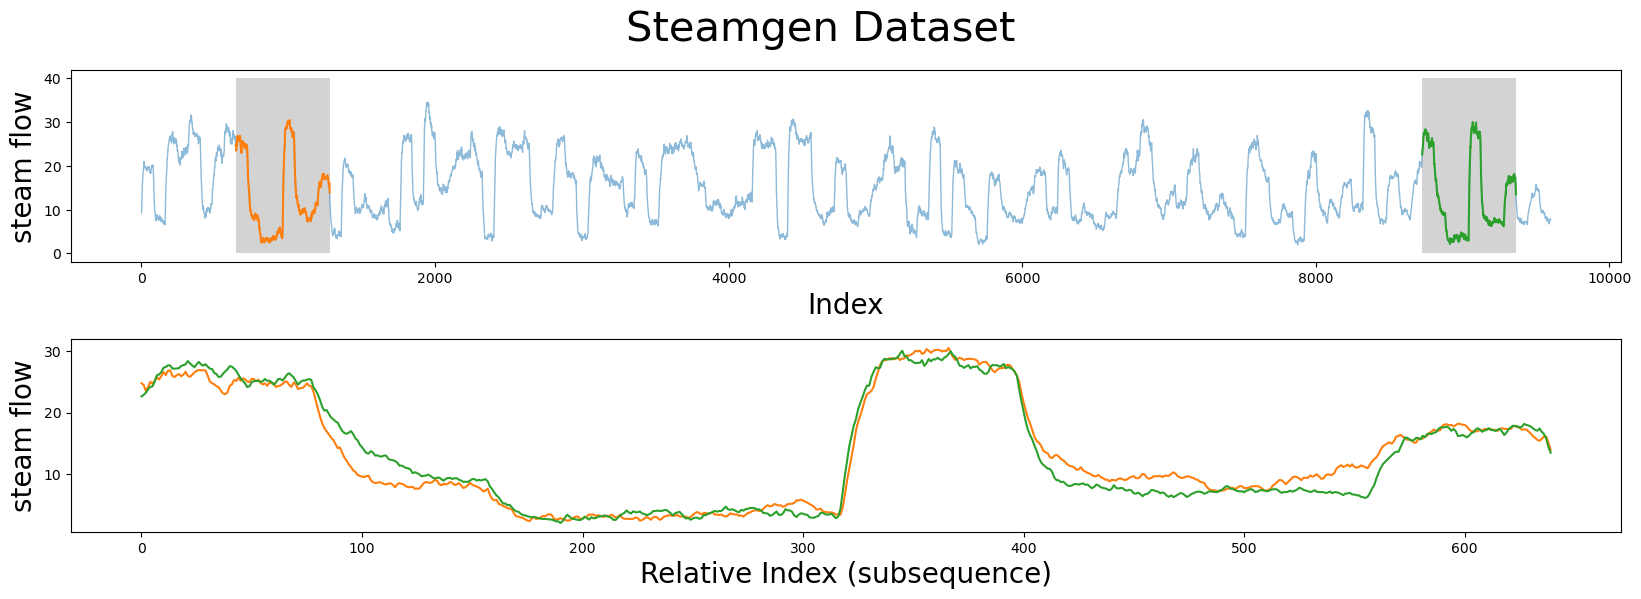

In [ ]:
mp.plot_dataFrame_compareSubsequences('Steamgen Dataset', steam_df, 3, 640, 643, 8724)

In [ ]:
steam_mps = mp.MatrixProfiles()
steam_mps.subsequence_len = 640
steam_mps.data = steam_df['steam flow']
steam_mps.compute('stump', print_flag = False, debug = False, timed = True)
steam_mps.compute('scamp', print_flag = False, debug = False, timed = True)

MatrixProfile(matrix_profile=array([16.23541  , 16.081919 , 15.909404 , ...,  9.02293  ,  9.0382595,
        9.054692 ], dtype=float32), computation_time=0.11172819137573242, subsequence_len=640, method='scamp', index=array([2242, 2243, 2245, ...,  877,  878,  879], dtype=int32), index_left=[], index_right=[], motif_idx=0, motif_nearest_neighbor_idx=0, motif_nearest_neighbor_idx_left=0, motif_nearest_neighbor_idx_right=0, discord_idx=0, discord_nearest_neighbor_idx=0, discord_nearest_neighbor_idx_left=0, discord_nearest_neighbor_idx_right=0)

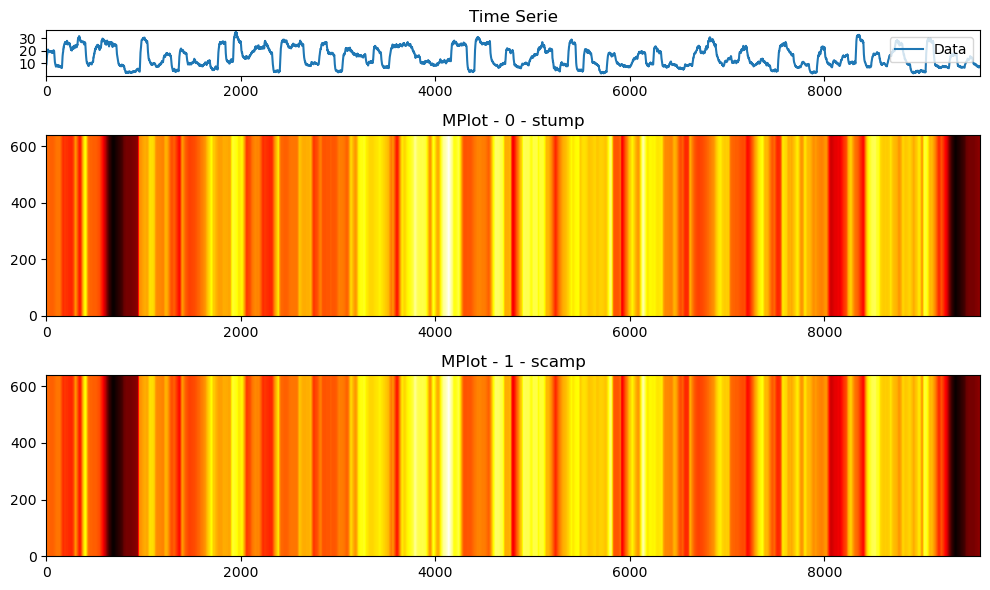

In [ ]:
steam_mps.plot()

In [ ]:
print("Ts ~ ", steam_mps.data.shape)
print("Expected mp length: ", int(np.floor(steam_mps.data.shape[0]-steam_mps.subsequence_len+1)))
print("mp_stumpy ~", steam_mps.matrix_profiles[0].matrix_profile.shape)
print("mp_scamp ~", steam_mps.matrix_profiles[1].matrix_profile.shape)
print(steam_mps.matrix_profiles[0])
print(steam_mps.matrix_profiles[1])

Ts ~  (9600,)
Expected mp length:  8961
mp_stumpy ~ (8961,)
mp_scamp ~ (8961,)
MP: [16.23541147724783 16.08191866323061 15.909403017873444 ...
 9.02293137221496 9.038259675949304 9.054692514421284]
Ids: [2242 2243 2245 ... 877 878 879]
Ids_left: [-1 -1 -1 ... 877 878 879]
Ids_right: [2242 2243 2245 ... -1 -1 -1]
Computation_time: 14.86120343208313
subsequence_len: 640
method: stump
MP: [16.23541   16.081919  15.909404  ...  9.02293    9.0382595  9.054692 ]
Ids: [2242 2243 2245 ...  877  878  879]
Ids_left: []
Ids_right: []
Computation_time: 0.11172819137573242
subsequence_len: 640
method: scamp


In [ ]:
stumpy_idxs = steam_mps.get_motif_idx(0)
scamp_idxs = steam_mps.get_motif_idx(1)

In [ ]:
print(f"The motif (according to stumpy) is located at index {stumpy_idxs[0]}")
print(f"The motif (according to scamp) is located at index {scamp_idxs[0]}")

The motif (according to stumpy) is located at index 643
The motif (according to scamp) is located at index 8724


### --> Tiene sentido que haya salido diferente por tema de decimales... 
> ¿Serán vecinos?

In [ ]:
print(f"The nearest neighbor (stumpy) is located at index {stumpy_idxs[1]}")
print(f"The nearest neighbor (scamp) is located at index {scamp_idxs[1]}")

The nearest neighbor (stumpy) is located at index 8724
The nearest neighbor (scamp) is located at index 643


¡Son los vecinos más cercanos en ambos casos!
De hecho, si imprimimos los valores, la z-distancia euclídea es la misma hasta donde podemos ver...

In [ ]:
print( steam_mps.matrix_profiles[1].matrix_profile[stumpy_idxs[0]])
print( steam_mps.matrix_profiles[1].matrix_profile[stumpy_idxs[1]])
print( steam_mps.matrix_profiles[0].matrix_profile[scamp_idxs[0]])
print( steam_mps.matrix_profiles[0].matrix_profile[scamp_idxs[1]])

5.4916167
5.4916167
5.491619827769537
5.491619827769537


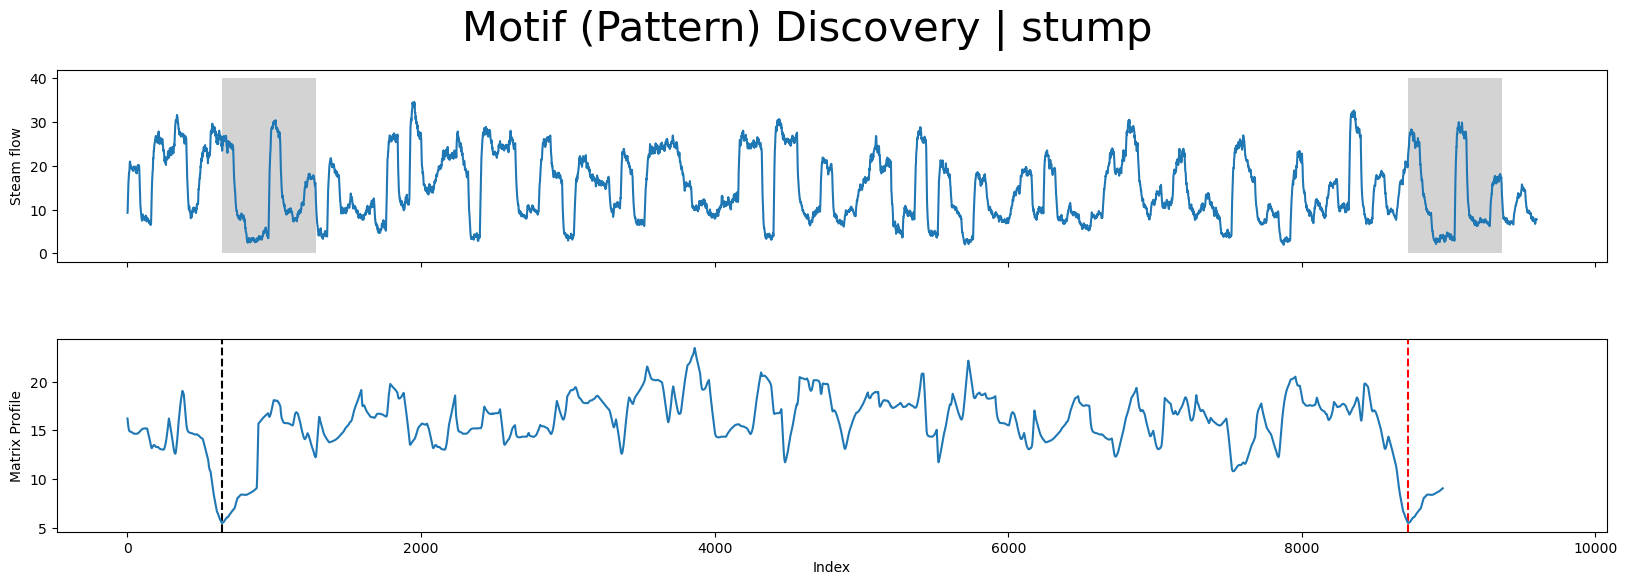

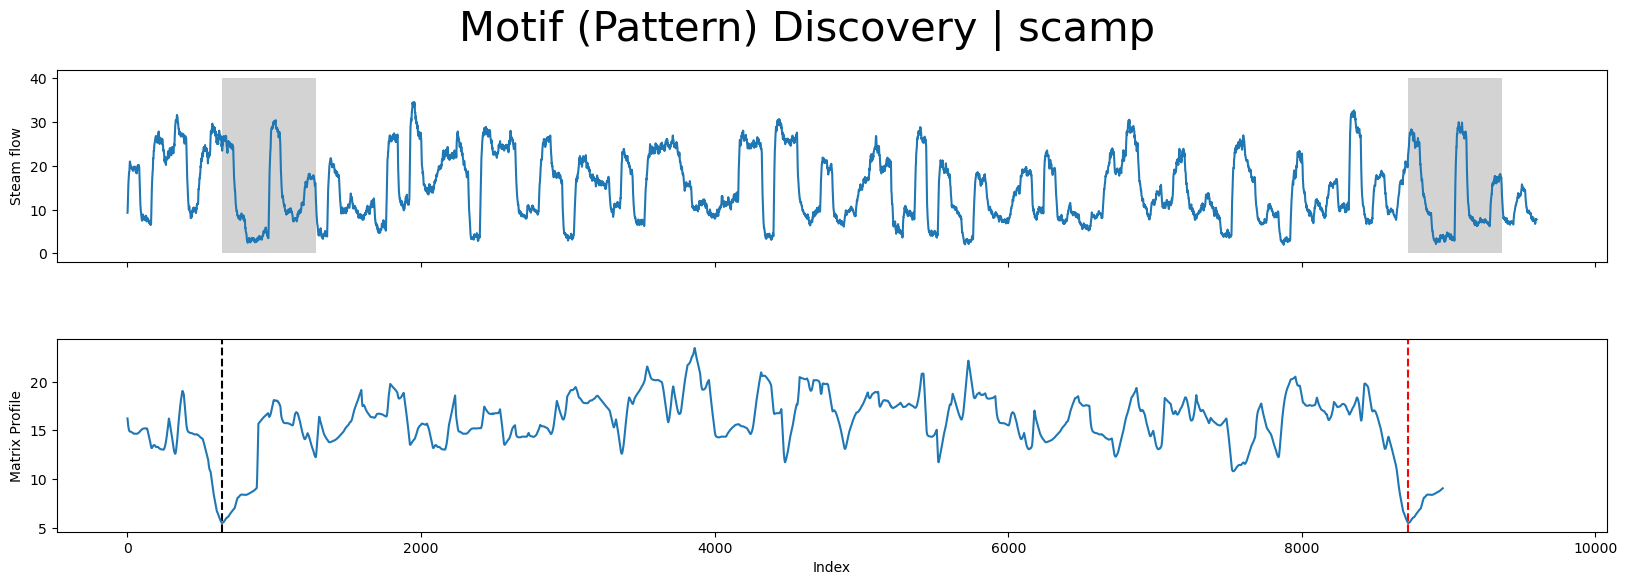

In [ ]:
steam_mps.plot_motif('Steam flow', 0, stumpy_idxs[0], stumpy_idxs[1], '30', '10')
steam_mps.plot_motif('Steam flow', 1, stumpy_idxs[0], stumpy_idxs[1], '30', '10')

## Discord / Anomaly

In [ ]:
#mp_stumpy_sorted = np.argsort( steam_mps.matrix_profiles[0].matrix_profile )
#mp_scamp_sorted =  np.argsort( steam_mps.matrix_profiles[1].matrix_profile )

#discord_idx_stumpy = mp_stumpy_sorted[-1]

#discord_idx_scamp = mp_scamp_sorted[-1]
#print( steam_mps.matrix_profiles[1].matrix_profile[stumpy_idxs[0]])
steam_mps.get_anomaly_idx(0)
steam_mps.get_anomaly_idx(1)
discord_idx_stumpy = steam_mps.matrix_profiles[0].discord_idx
discord_idx_scamp = steam_mps.matrix_profiles[1].discord_idx
print(f"Stumpy: The discord is located at index {discord_idx_stumpy}")
print(f"Scamp: The discord is located at index {discord_idx_scamp}")

Stumpy: The discord is located at index 3864
Scamp: The discord is located at index 3864


In [ ]:
print("Stumpy | Discord: [", steam_mps.matrix_profiles[0].matrix_profile[discord_idx_stumpy],",", steam_mps.matrix_profiles[0].index[discord_idx_stumpy], "]")
print("Scamp |  Discord: [", steam_mps.matrix_profiles[1].matrix_profile[discord_idx_scamp], ",",steam_mps.matrix_profiles[1].index[discord_idx_scamp], "]")

Stumpy | Discord: [ 23.47616836730202 , 4755 ]
Scamp |  Discord: [ 23.476168 , 4755 ]


The subsequence located at this global maximum is also referred to as a discord, novelty, or “potential anomaly”:

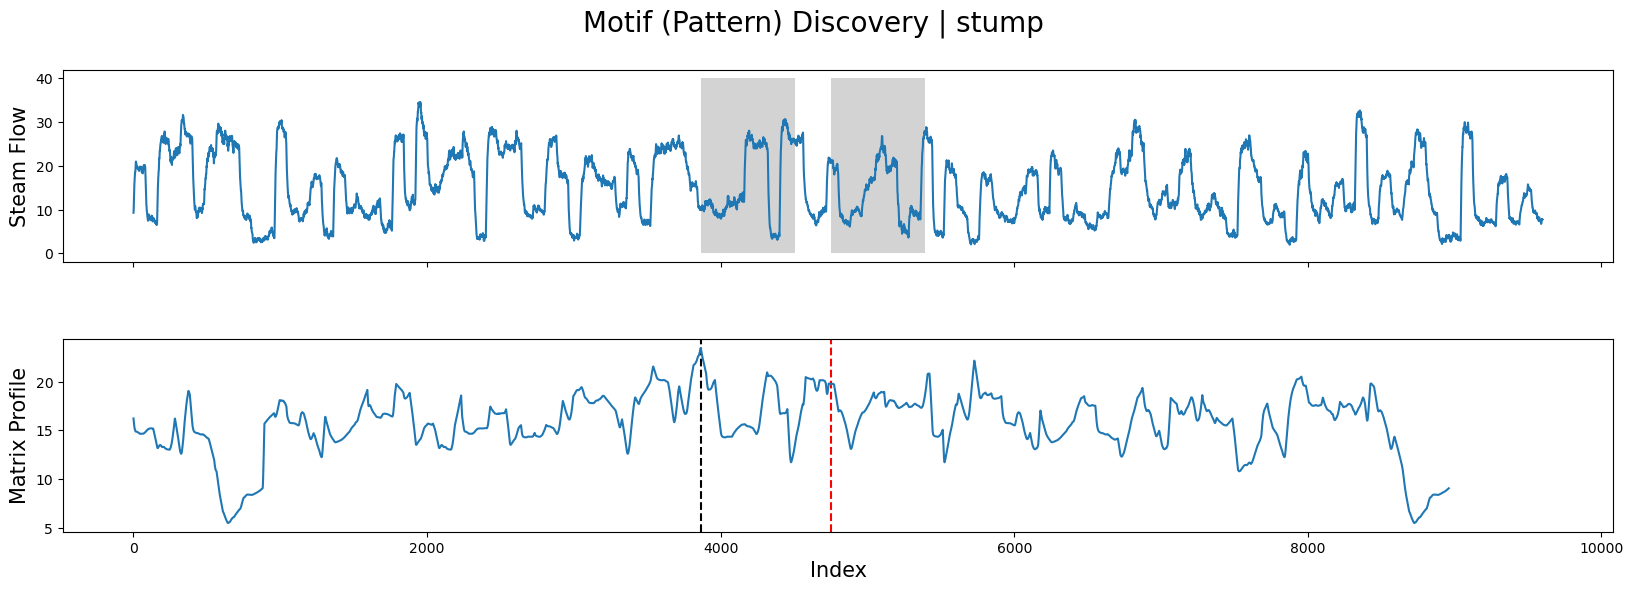

In [ ]:
steam_mps.plot_motif(
    'Steam Flow', 
    0, 
    steam_mps.matrix_profiles[0].discord_idx, 
    steam_mps.matrix_profiles[0].discord_nearest_neighbor_idx, 
    '20',
    '15'
)

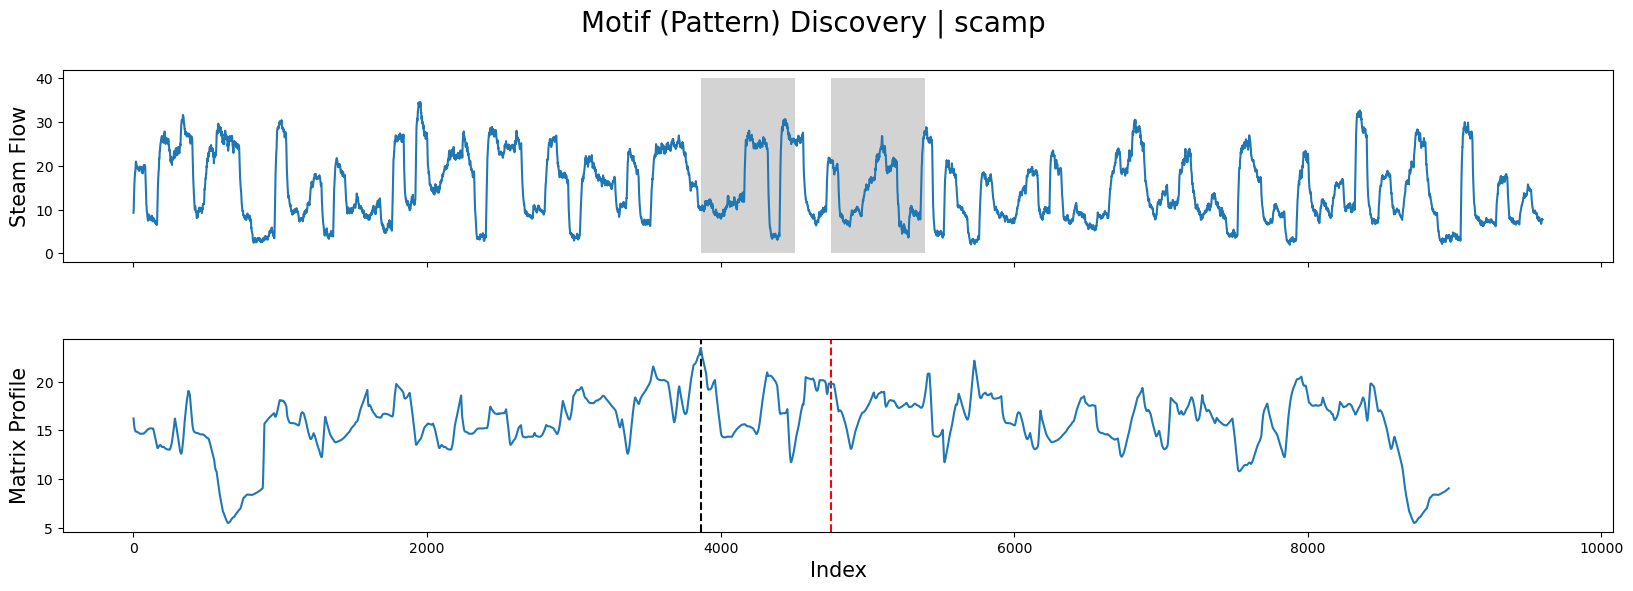

In [ ]:
steam_mps.plot_motif(
    'Steam Flow', 
    1, 
    steam_mps.matrix_profiles[1].discord_idx, 
    steam_mps.matrix_profiles[1].discord_nearest_neighbor_idx, 
    '20',
    '15'
)

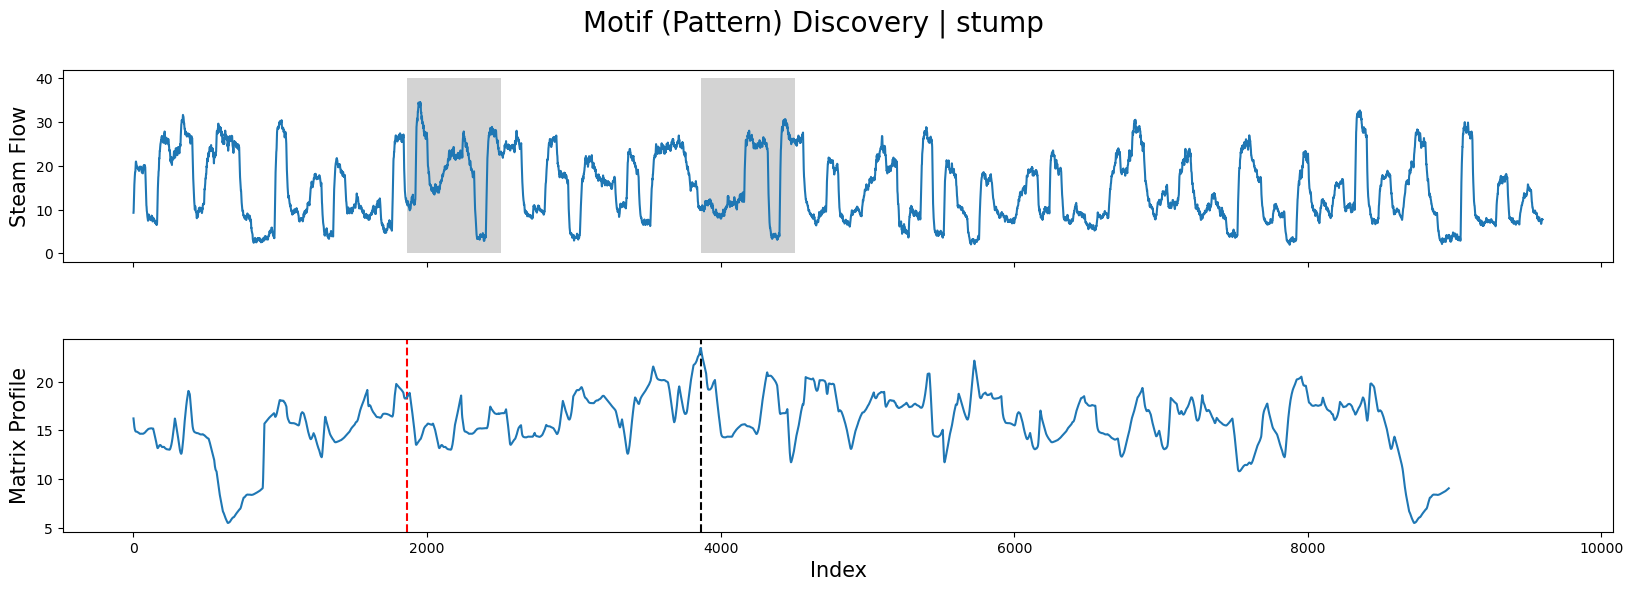

In [ ]:
steam_mps.plot_motif(
    'Steam Flow', 
    0, 
    steam_mps.matrix_profiles[0].discord_idx, 
    steam_mps.matrix_profiles[0].discord_nearest_neighbor_idx_left, 
    '20',
    '15'
)

Intentando ver la matriz Distance Profile al completo

In [ ]:
steam_flow = steam_df['steam flow'].values
#No nans
steam_flow = [ 0 if np.isnan(x) else x for x in steam_flow ]

## Cogiendo Distance Matrix al completo 
> En busca del MPlot

In [ ]:
steam_mps.data
steam_mps.subsequence_len
# Ensure no nans 
steam_mps.data = [ 0 if np.isnan(x) else x for x in steam_mps.data ]

In [ ]:
#n = len(steam_flow) 
#subsequence_len = m
#print("Expected: ", len(steam_flow) - m + 1)

In [ ]:
#MPlot_matrix_stumpy = np.empty((n - m + 1, n - m + 1))
#MPlot_matrix_scamp = np.empty((n - m + 1, n - m + 1))

In [ ]:
mplot_stumpy = mp.MatrixProfilePlot(data = steam_mps.data, subsequence_len = steam_mps.subsequence_len)
mplot_scamp  = mp.MatrixProfilePlot(data = steam_mps.data, subsequence_len = steam_mps.subsequence_len)

In [ ]:
reference_idx = np.random.randint(low=0, high=len(steam_flow) - steam_mps.subsequence_len)
reference_subseq = steam_flow[reference_idx:reference_idx + steam_mps.subsequence_len]

### Calcular el Distance Profile para cada subsecuencia en la serie temporal respecto a la secuencia de referencia

In [ ]:
mplot_stumpy.compute_similarity_matrix(
    subsequence_len = mplot_stumpy.subsequence_len,
    reference_seq   = reference_subseq,
    method          = 'stump',
    timed           = True,
    print_flag      = True
)

NameError: name 'Time' is not defined

In [ ]:
mplot_scamp.compute_similarity_matrix(
    subsequence_len = mplot_stumpy.subsequence_len,
    reference_seq   = reference_subseq,
    method          = 'scamp',
    timed           = True,
    print_flag      = True
)

In [ ]:
mplot_stumpy.plot('Steam flow', "Stumpy")
mplot_scamp.plot('Steam flow', "Scamp")

### Calcular el Distance Profile para cada subsecuencia en la serie temporal al completo

In [ ]:
mplot_stumpy.compute_similarity_matrix(
    subsequence_len = mplot_stumpy.subsequence_len,
    #reference_seq   = reference_subseq,
    reference_seq   = None,
    method          = 'stump',
    timed           = True,
    print_flag      = True
)

In [ ]:
mplot_stumpy.plot('Steam flow', "Stumpy")

In [ ]:
mplot_scamp.compute_similarity_matrix(
    subsequence_len = mplot_stumpy.subsequence_len,
    reference_seq   = None, #reference_subseq,
    method          = 'scamp',
    timed           = True,
    print_flag      = True
)

In [ ]:
print(len(steam_flow))
print(mplot_stumpy.similarity_matrix.shape)
print(mplot_scamp.similarity_matrix.shape)

In [ ]:
mplot_scamp.plot('Steam flow', "Scamp")